In [1]:
import kneed
import sklearn
import numpy as np
from kneed import KneeLocator
from sklearn.cluster import KMeans
from collections import Counter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas
import matplotlib.pyplot as plt
from collections import defaultdict


In [2]:
# Create function that runs kmeans with a range of clusters with the data, test the accuracy (inertia) of different cluster numbers representing the raw data using the elbow method, return the optimal number of clusters

def K(data, max_k = 11, plot = False):

    inertias = []
    for i in range(1,max_k):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    kl = KneeLocator(range(1, max_k), inertias, curve="convex", direction="decreasing")
    if plot :
        kl.plot_knee()
    return kl.elbow


# normalize data
def normalize(data) :
	'''Normalize data so each column has a mean of 0 and a standard deviation of 1'''
	return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Create function that plots kmeans data based on the data and elbow method
def plotKMeans(data, labels1, labels2 = None): 
    """"
    input data,
    returns plot of data color-coded by labels1; If labels2 is specified, we use 'x' to indicate a difference between label values (e.g., incorrect classification)
    
    """

    date = np.array(data)
    x, y = date.T

    if np.any(labels2 == None):
       plt.scatter(x,y,c = labels1)
       return None

    assignedDict = labelClusters(labels1, labels2)
    assigned = [assignedDict[l] for l in labels1]
    correct = np.array(assigned) == np.array(labels2)
    wrong = np.logical_not(correct)

    fig, ax = plt.subplots()
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    i = 0
    for s in set(labels1) :
        index = np.logical_and(correct, labels1 == s)
        ax.scatter(x[index], y[index], c=colors[i], label = assignedDict[s])
    
        index = np.logical_and(wrong, labels1 == s)
        ax.scatter(x[index], y[index], c=colors[i], label = '_no_legend_', marker = 'x')
    
        i+= 1
    
    handles, labels = plt.gca().get_legend_handles_labels()
    order = np.argsort(labels)
    ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
    plt.show()


def labelClusters(klabels, labels, print_df = False):
    
    # create default dictionary with default an empty list
    # the key is the klabel and the value is the list of values for that label
    counters = defaultdict(list)

    # for each klabel and label
    for k, l in zip(klabels, labels) :    
        # add the label to the dictionary
        counters[k] += [l]
        
    # count the number of values for each klabel
    for k in counters :
        counters[k] = Counter(counters[k])
    counters
    
    # create a dictionary of clusterLabels based on the most common value for each klabel
    clusterLabels = {}
    for k in counters:
        c = counters[k]
        clusterLabels[k] = c.most_common(1)[0][0]
        
    return clusterLabels


def getClusters(data, labels):
    """"
    input: data, labels
    returns tuple: cluster labels, number of clusters
    
    """
    
    y = K(data)
    gSList = set(labels)
    glist = []
    for x in gSList:
        glist.append(x)
    glist.append(y)
    v = tuple(glist)
    return v


def assignClusters(klabels, labels):
    """"
    input: arbitrary k means labels, true labels
    
    converts arbitrary k means labels list into a list based on which arbitrary cluster is associated with which 
    real cluster (using labelClusters)
    
    returns: list of predicted clusters w/ true labels
    """
    
    tlist = []
    dictt = labelClusters(klabels, labels)
    print(dictt)
    
    
    for y in range(len(klabels)):
        for x in dictt:
            if dictt[x] == klabels[y]:
                tlist.append(x)
    return tlist


def randIndex(klabels, labels):
    """"
    input: klabels, labels
    
    uses assign clusters and true cluster labels to measure accuracy of kmeans on data. rand index takes compares 
    how well the predicted clusters and the true clusters line up. getClusters is used to find cluster names and 
    predicted number of clusters (k) in final tuple
    
    return rand index
    """
    listl = assignClusters(klabels, labels)
    print(labels)
    print(listl)
    print(klabels)
    
    score = sklearn.metrics.rand_score(klabels, labels)
    
    return score 
    

Training...


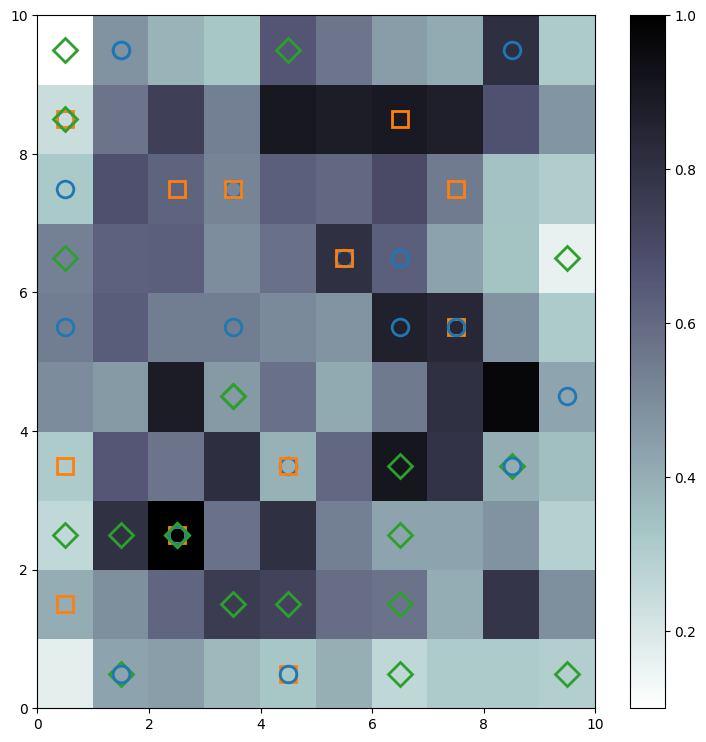

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

# Defining the data and labels
data = np.random.rand(50, 2)  # replace with your own data
labels = np.random.choice(['Cow', 'Rock', 'Horse'], size=50)  # replace with your own labels

# Initializing the SOM
som = MiniSom(x=10, y=10, input_len=2, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)
print("Training...")
som.train_random(data, 100)

# Plotting the distance map
plt.figure(figsize=(9, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

# Plotting the response for each pattern in the data
# using different colors and markers for each label
markers = ['o', 's', 'D']  # use any markers you like
colors = ['C0', 'C1', 'C2']  # use any colors you like
label_map = {label: i for i, label in enumerate(np.unique(labels))}
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # placing a marker on the winning position for the sample xx
    label = labels[cnt]
    color = colors[label_map[label]]
    marker = markers[label_map[label]]
    plt.plot(w[0]+.5, w[1]+.5, marker, markerfacecolor='None',
             markeredgecolor=color, markersize=12, markeredgewidth=2)

plt.show()